In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [118]:
df_st = pd.read_csv("../csv-data/starbucks.csv").fillna("")
df_bc = pd.read_csv("../csv-data/best cities for a workation.csv", encoding='utf-8')

In [119]:
df_st=df_st.rename(columns={'Country':'code'})
st_list=[]
st_list=df_st['code'].value_counts()
df_st2=st_list.to_frame(name='매장 수')
# df_st2.reset_index(level=0, inplace=True)
# df_st2.rename(columns={'index':'국가'}, inplace=True)
df_st2

,매장 수
US,13608
CN,2734
CA,1468
JP,1237
KR,993
...,...
CW,3
TT,3
LU,2
MC,2


In [120]:
bc_st=pd.read_csv('bc_st.csv')

In [121]:
bc_st.sort_values('Ranking', ascending=True, inplace=True)
bc_st
# Starbucks_in_Workation에서 저장했던 csv파일 데이터를 확인

,Unnamed: 0,Ranking,City,Country,code,num_st_city,num_st_country
0,0,1,Bangkok,Thailand,TH,76,289
1,1,2,New Delhi,India,IN,16,88
2,2,3,Lisbon,Portugal,PT,2,11
3,3,4,Barcelona,Spain,ES,20,101
4,4,5,Buenos Aires,Argentina,AR,74,108
...,...,...,...,...,...,...,...
142,142,143,Beirut,Lebanon,LB,12,29
143,143,144,Zurich,Switzerland,CH,25,61
144,144,145,Geneva,Switzerland,CH,5,61
145,145,146,Valletta,Malta,MT,0,0


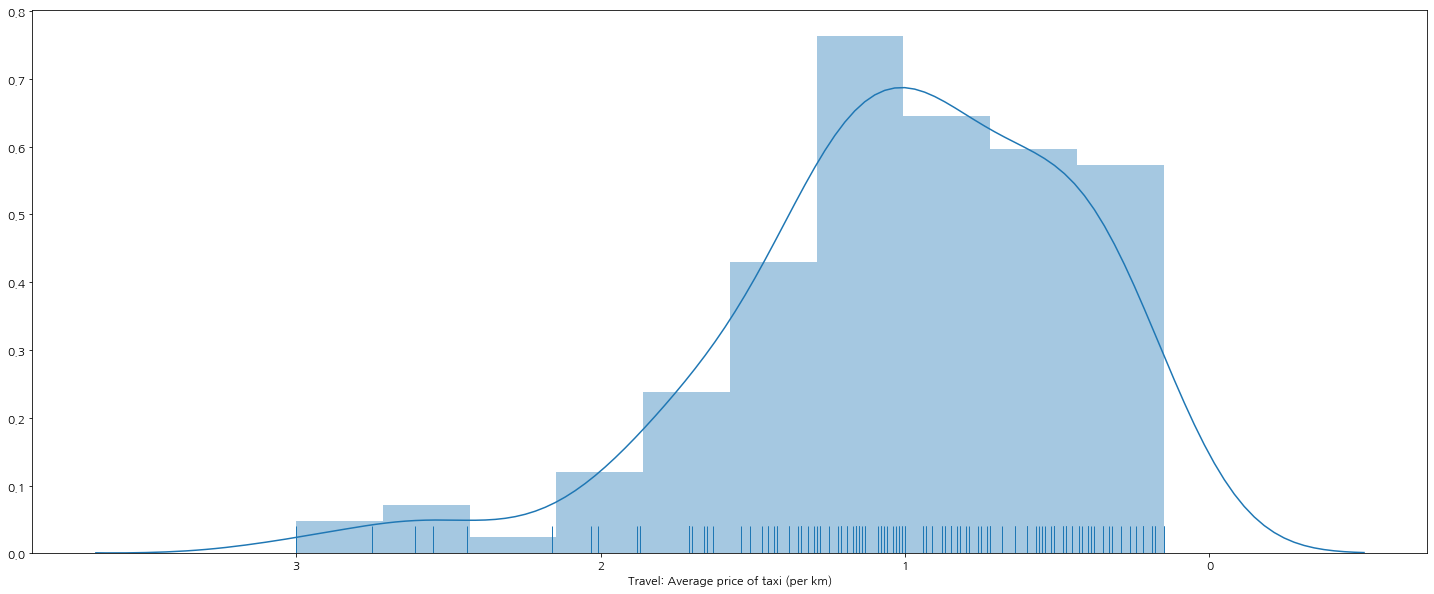

In [129]:
sns.distplot(df_bc['Travel: Average price of taxi (per km)'], rug=True).invert_xaxis()
#일하기 좋은 도시의 순위(x축), 여행시 평균 택시비(y축)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


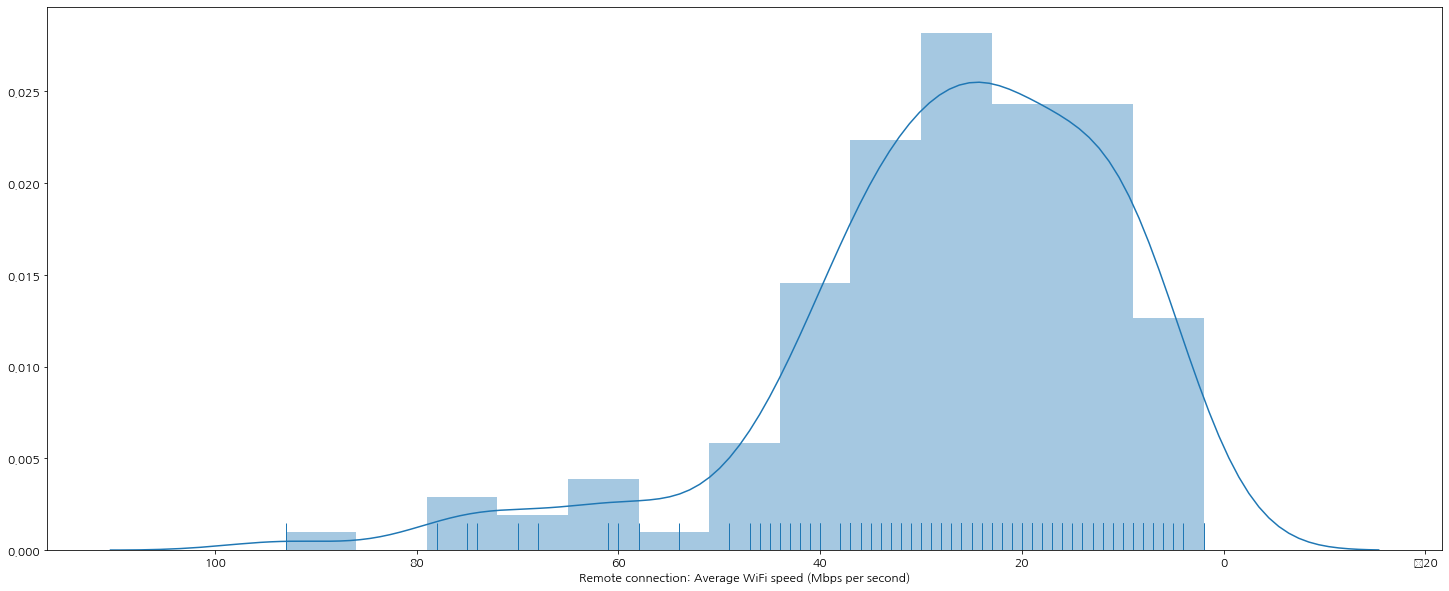

In [130]:
sns.distplot(df_bc['Remote connection: Average WiFi speed (Mbps per second)'], rug=True).invert_xaxis()
#일하기 좋은 도시의 순위(x축), 와이파이 속도(y축)

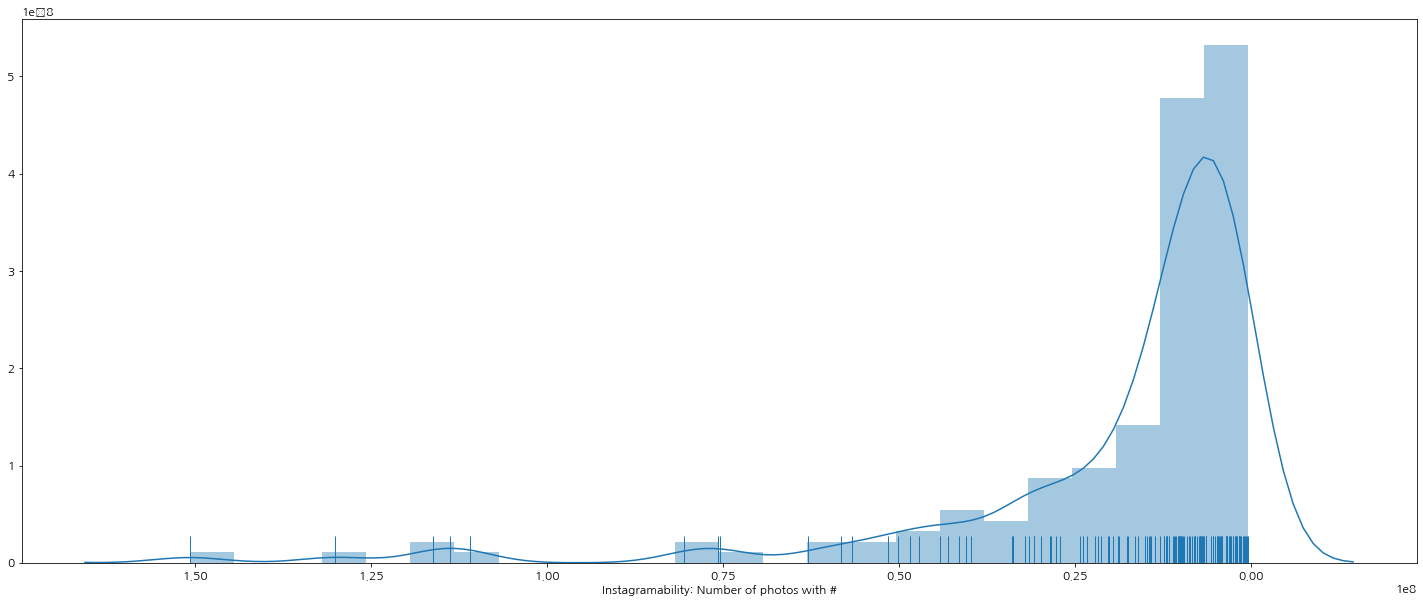

In [132]:
sns.distplot(df_bc['Instagramability: Number of photos with #'], rug=True).invert_xaxis()
#일하기 좋은 도시의 순위(x축), 인스타그램에 올린 사진 수(y축)

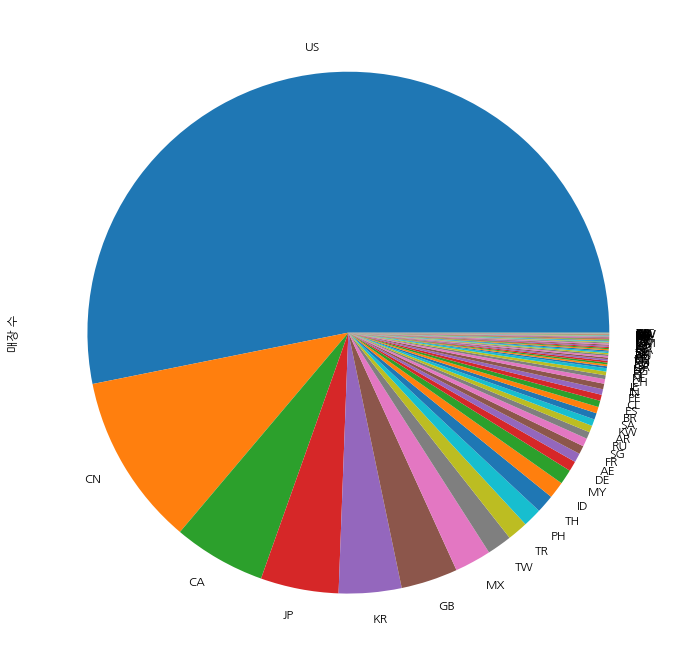

In [124]:
plt.rcParams["figure.figsize"]=(12,12)
df_st2['매장 수'].plot.pie() 
#국가별 스타벅스 매장 수

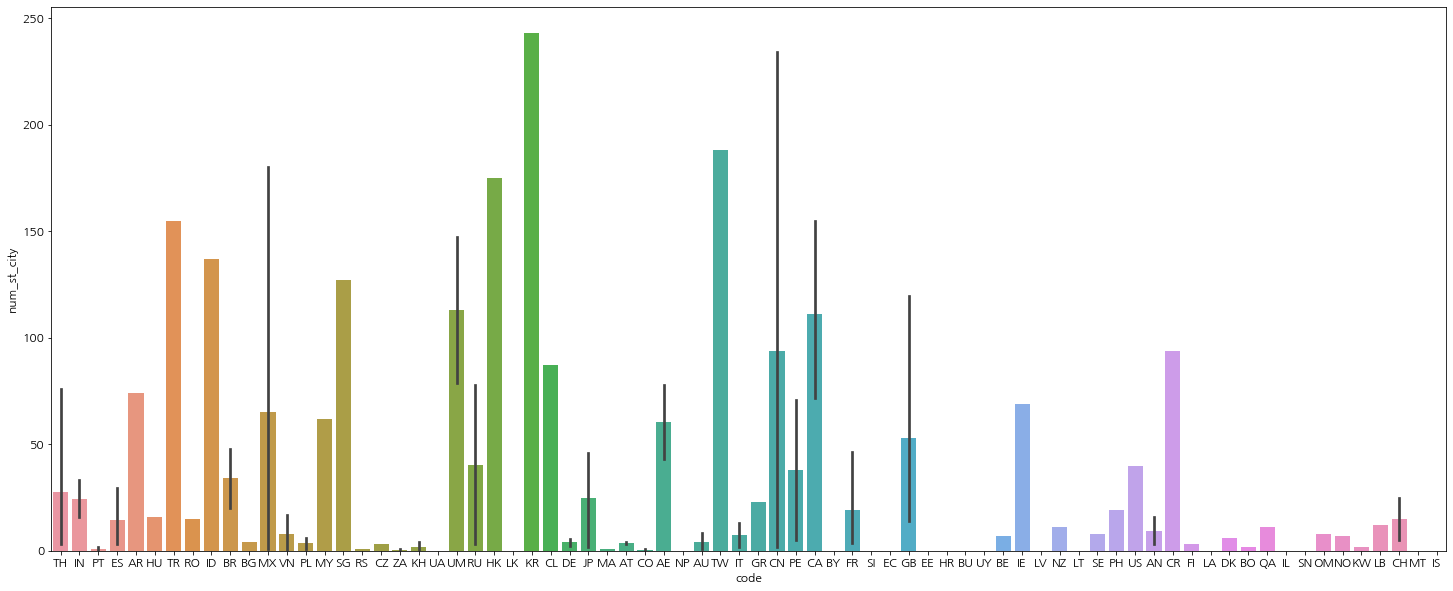

In [125]:
plt.rcParams["figure.figsize"]=(25,10)
plt.rcParams["font.size"]=12
sns.barplot(x='code', y='num_st_city', data=bc_st)
#도시별 스타벅스 매장 수

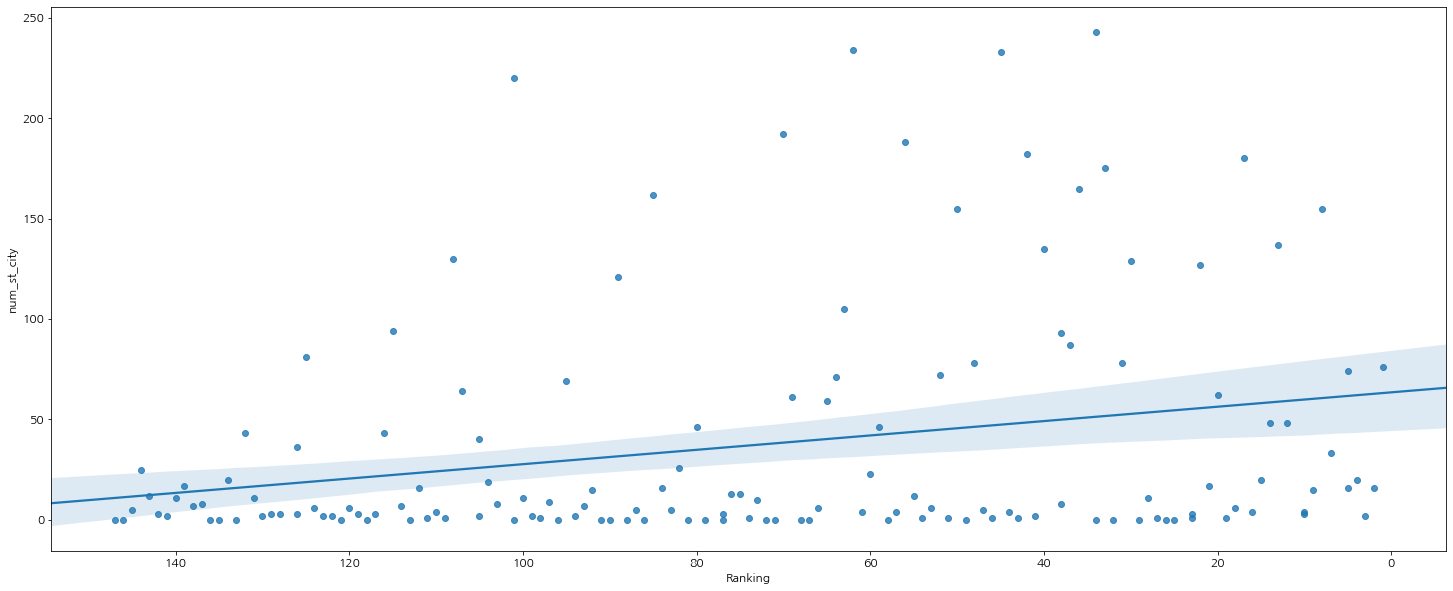

In [126]:
sns.regplot(x='Ranking', y='num_st_city', data=bc_st, fit_reg=True).invert_xaxis()
#일하기 좋은 도시의 랭킹(x축) 별 스타벅스 매장 수(y축)

In [155]:
bc_st.corr()

,Unnamed: 0,Ranking,num_st_city,num_st_country
Unnamed: 0,1.000000,0.999984,-0.258433,0.092579
Ranking,0.999984,1.000000,-0.258834,0.092478
num_st_city,-0.258433,-0.258834,1.000000,0.145875
num_st_country,0.092579,0.092478,0.145875,1.000000
